In [1]:
#load libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Load Images

In [40]:
import os

directory = '29561_37705_bundle_archive/img_align_celeba/img_align_celeba/'

#get a list of images_names
imgs_list = os.listdir(directory)

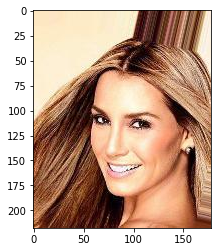

In [41]:
test_img = cv2.imread(directory+imgs_list[0])
test_img_copy = np.copy(test_img)
test_img_copy = cv2.cvtColor(test_img_copy, cv2.COLOR_BGR2RGB)

plt.imshow(test_img_copy)

In [42]:
def load_image(directory):
    #load in a image from a given directory return:ndarray of image
    img = cv2.imread(directory)
    img_copy = np.copy(img)
    img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
    
    return img_copy     #return a (RGB) image in (height, width, channel)   

######################################
#remember to convert these into (c,h,w)
######################################

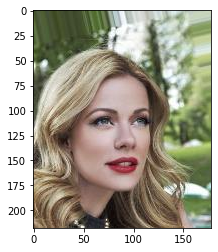

In [46]:
plt.imshow(load_image(directory+imgs_list[13450]))
# plt.imshow(cv2.resize(load_image(directory+imgs_list[13450]), (80,80)))

In [47]:
def extract_face(img_array, crop_size=(80,80)):
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    
    gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
    
    faces = face_cascade.detectMultiScale(gray)
    
    #if there are no faces detected return None
    if len(faces)==0:
        return None
    
    x1, y1, w, h = faces[0] 
    x2, y2 = x1+w, y1+h
    
    face_img = img_array[y1:y2, x1:x2]
    face_img = cv2.resize(face_img, crop_size)
    
    return face_img                 #return a crop_size cropped image of a face 

#############################
#if there are no faces detected this will return None datatype
#############################

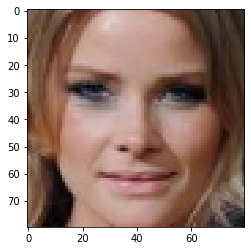

In [75]:
plt.imshow(extract_face(load_image(directory+imgs_list[9])))

In [103]:
extract_face(load_image(directory+imgs_list[9])).shape

(80, 80, 3)

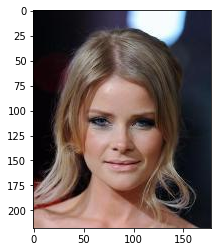

In [76]:
plt.imshow(load_image(directory+imgs_list[9]))

In [133]:
def load_faces(directory, imgs_list, n_faces):
    
    faces = list()
    
    for img_name in imgs_list:
        full_image = load_image(directory+img_name)
        face_img = extract_face(full_image)
        
        if face_img is None:
            continue
        
        #convert image to have shape (channel, height, weight) #this order is needed by PyTorch
        face_img = np.transpose(face_img, (2,0,1))
        faces.append(face_img)
        
        if len(faces) >= n_faces:
            break
            
    faces = np.asarray(faces)
            
    return faces  #return an array with cropped face images  in shape (n_images, channel, height, width)

In [150]:
test_faces = load_faces(directory, imgs_list, 10)

In [151]:
test_faces.shape

(10, 3, 80, 80)

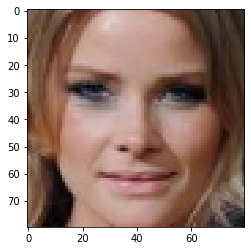

In [153]:
plt.imshow(np.transpose(test_faces[7], (1,2,0)))